In [14]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.naive_bayes import MultinomialNB,GaussianNB
from google.colab import drive

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
df = pd.read_csv('disaster_tweets.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [66]:
target_1_data = df[df['target'] == 1].head(100)
print(target_1_data)


      id    keyword   location  \
0      1        NaN        NaN   
1      4        NaN        NaN   
2      5        NaN        NaN   
3      6        NaN        NaN   
4      7        NaN        NaN   
..   ...        ...        ...   
196  276  ambulance        NaN   
197  277  ambulance      L. A.   
201  283  ambulance  Lexington   
202  285  ambulance        NaN   
203  287  ambulance        USA   

                                                  text  target  length  \
0    Our Deeds are the Reason of this #earthquake M...       1      69   
1               Forest fire near La Ronge Sask. Canada       1      38   
2    All residents asked to 'shelter in place' are ...       1     133   
3    13,000 people receive #wildfires evacuation or...       1      65   
4    Just got sent this photo from Ruby #Alaska as ...       1      88   
..                                                 ...     ...     ...   
196  #reuters Twelve feared killed in Pakistani air...       1      96   

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

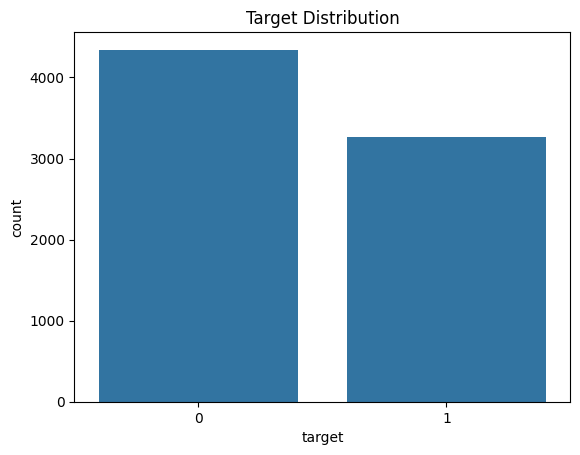

In [6]:
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

In [18]:
# textlerin uzunluğunu depolamak için yeni sütun oluşturma
df['length'] = df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


<Axes: ylabel='Frequency'>

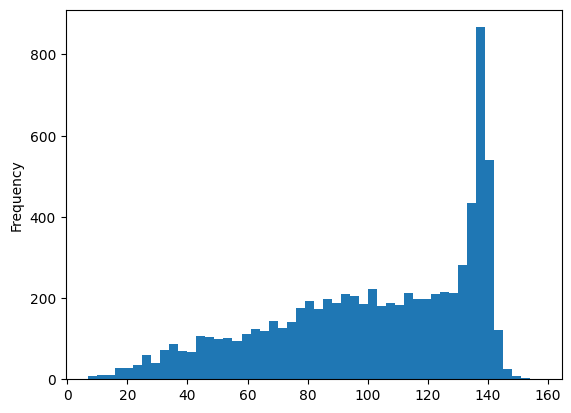

In [19]:
df['length'].plot(bins=50, kind='hist')

In [20]:
df.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [21]:
df[df['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

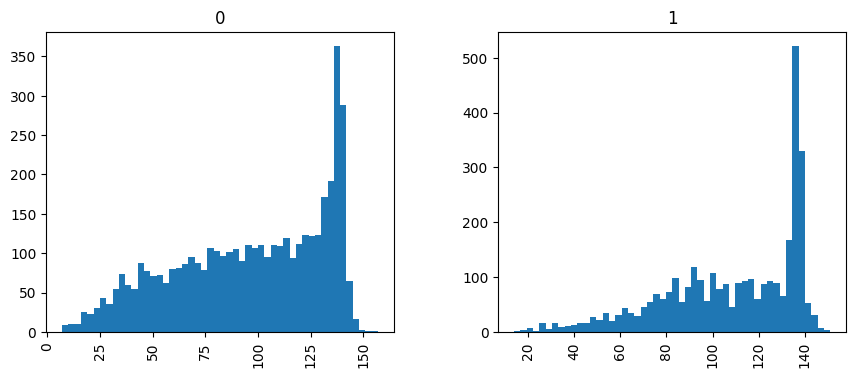

In [22]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

In [23]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df_1 = df[df['target']==1]
df_0 = df[df['target']==0]
df_1['text']=df_1['text'].apply(remove_stopwords)
df_0['text']=df_0['text'].apply(remove_stopwords)

<ipython-input-23-812a15432658>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['text']=df_1['text'].apply(remove_stopwords)
<ipython-input-23-812a15432658>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['text']=df_0['text'].apply(remove_stopwords)


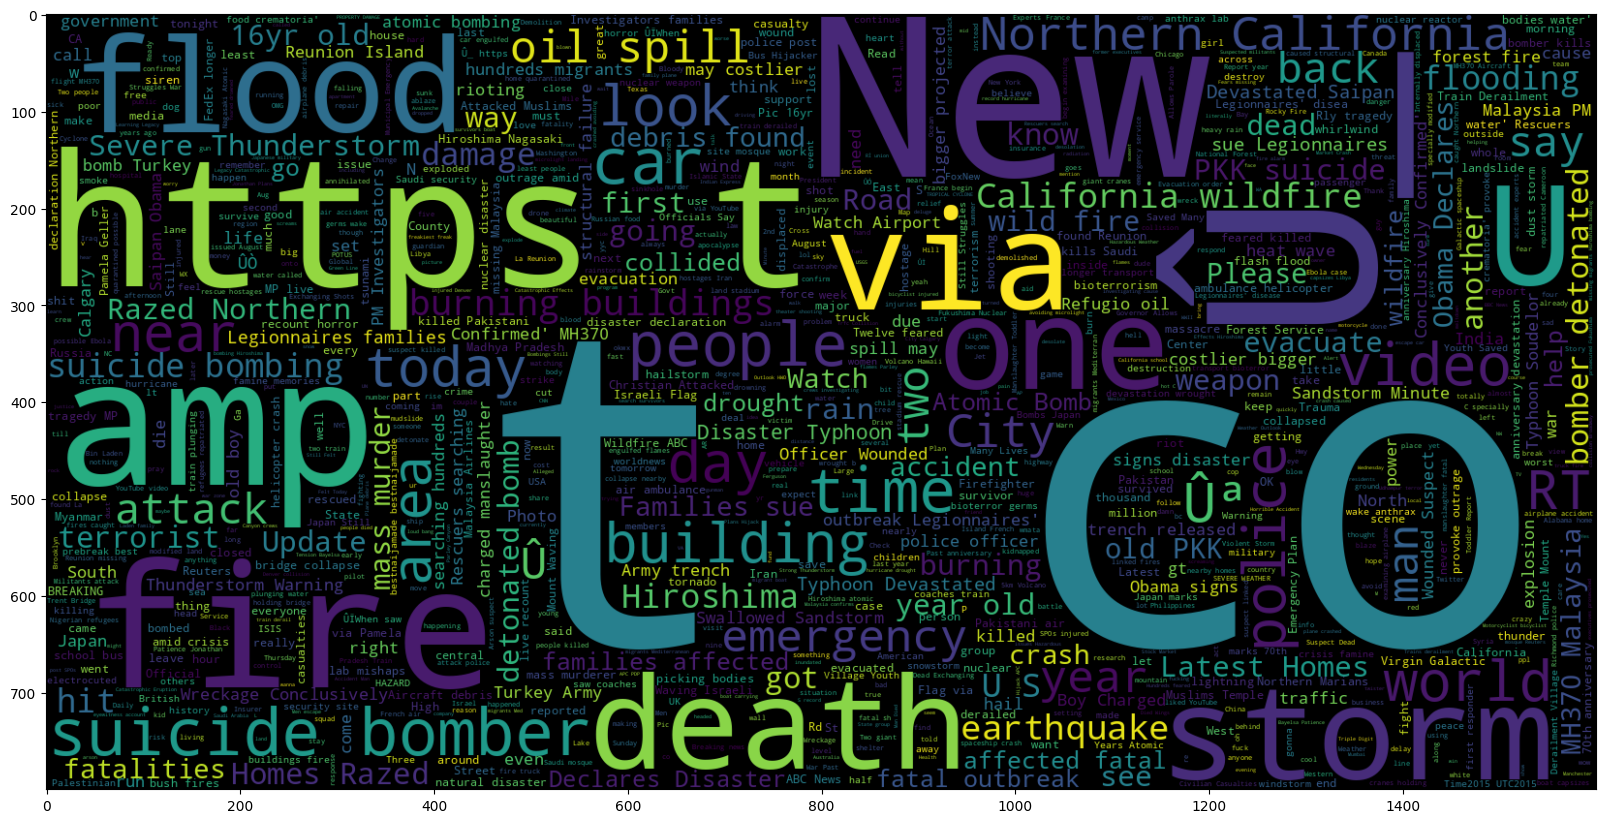

In [26]:
#Felaket Tweet'lerinden oluşan bir kelime bulutu
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_1.text))
plt.imshow(wc , interpolation = 'bilinear')

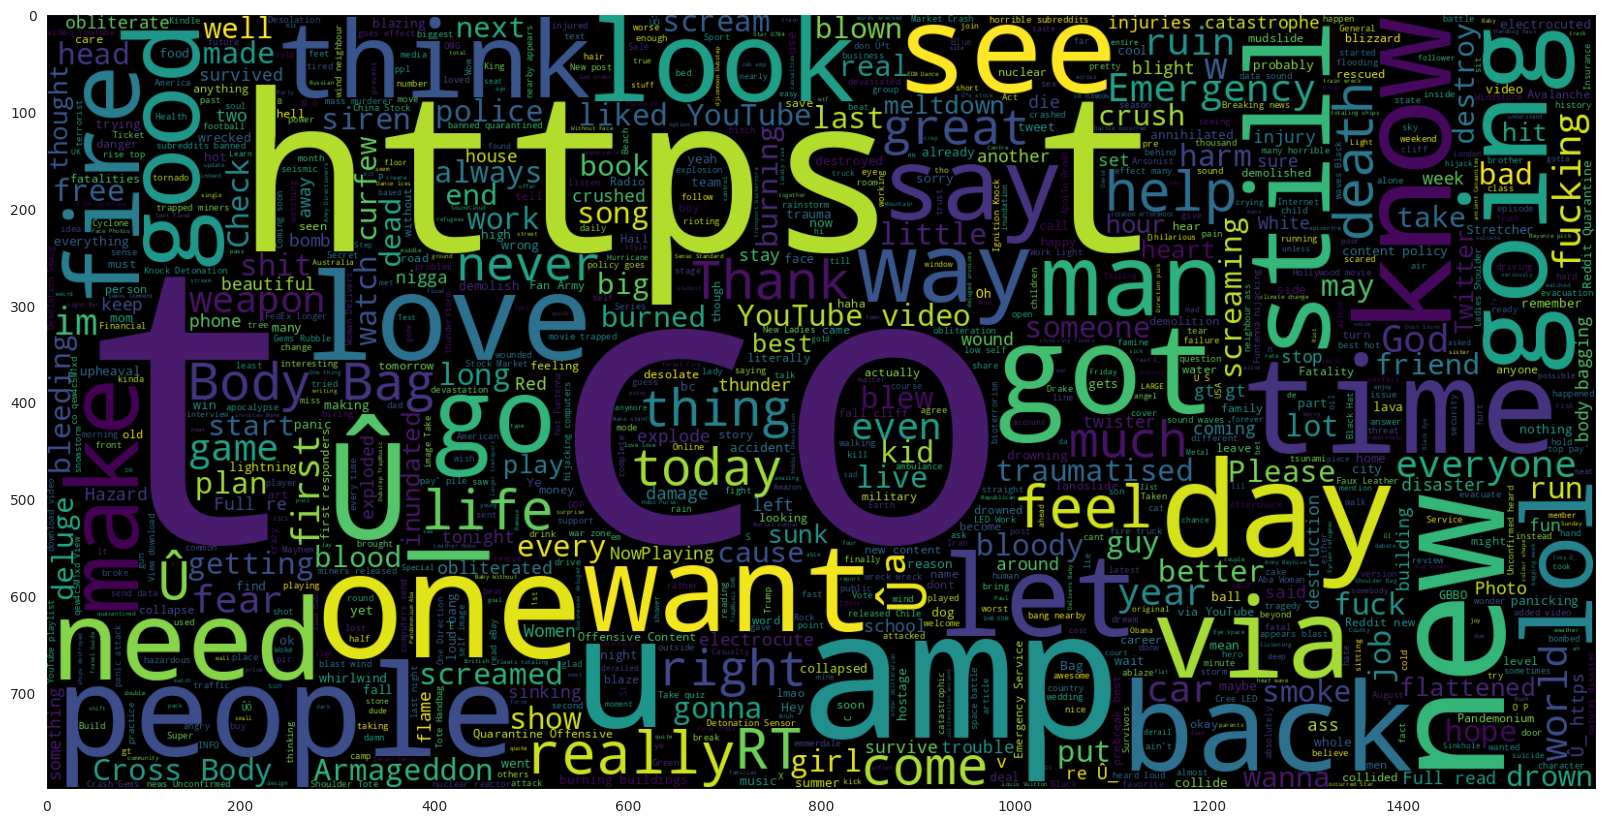

In [ ]:
##Normal Tweet'lerinden oluşan bir kelime bulutu
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_0.text))
plt.imshow(wc , interpolation = 'bilinear')

In [27]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

stop = stopwords.words('english')

def cleanTweet(txt):
  # küçük harf
    txt = txt.lower()
  # tokenlaştırma
    words = nltk.word_tokenize(txt)
  # kökünü alma stopwords değil ise
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
  # alfatik olmayan karakterlerin kaldırılması
    txt = re.sub('[^a-z]',' ',text)
    return txt

In [28]:
df['cleaned_tweets'] = df['text'].apply(cleanTweet)
df.head()

,id,keyword,location,text,target,length,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified offic...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire ...


In [29]:
#Özellik ve Hedef Değişkenleri Oluşturma
y = df.target
X=df.cleaned_tweets



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)


In [31]:
#TF-IDF Vectorizer - Bi-Gram
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [32]:
#Multinomial Naive Bayes
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)


MultinomialNB()

In [ ]:
#10-Fold Cross Validation #katlamalı çarpraz doğrulama

In [33]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10) #10 parçaya ayırdım
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_mnb2.mean()

0.7922824302134648

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.7338


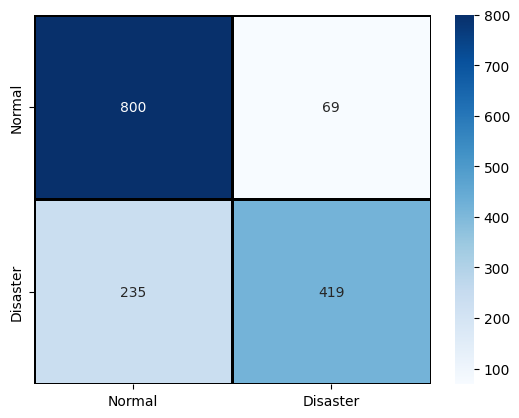

In [34]:
#Model Prediction Test set

pred_mnb2 = mnb_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_mnb2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)


model_results = pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

In [35]:
#Passive Aggressive Classifier

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)



PassiveAggressiveClassifier()

In [36]:
#10-Fold Cross Validation


kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass2 = cross_val_score(estimator = pass_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_pass2.mean()

0.7862068965517242

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.73380
1,Passive Aggressive Classifier - TFIDF-Bigram,0.784636,0.742560,0.762997,0.920598,0.75264


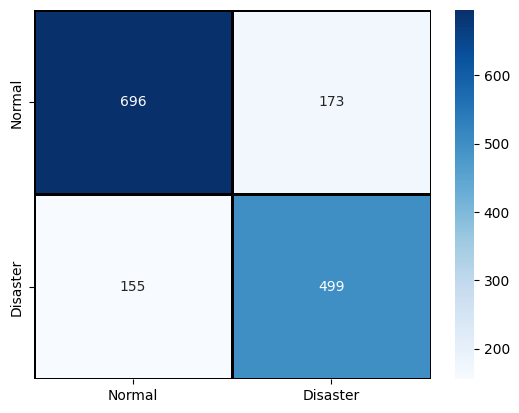

In [37]:
#Model Prediction

pred_pass2 = pass_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_pass2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_pass2)
prec = precision_score(y_test, pred_pass2)
rec = recall_score(y_test, pred_pass2)
f1 = f1_score(y_test, pred_pass2)

results =pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
results = pd.concat([model_results, results], ignore_index=True)

results

In [38]:
#TF-IDF Vectorizer - Tri Gram
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)



In [39]:
#Multinomial Naive Bayes - Tri Gram

mnb_tf3 = MultinomialNB()
mnb_tf3.fit(tfidf_train_3, y_train)

MultinomialNB()

In [40]:
#10-fold cross validation

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb3 = cross_val_score(estimator = mnb_tf, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_mnb3.mean()

0.7845648604269294

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.733800
1,Passive Aggressive Classifier - TFIDF-Bigram,0.784636,0.742560,0.762997,0.920598,0.752640
2,Multinomial Naive Bayes - TFIDF-Trigram,0.798424,0.866808,0.626911,0.920598,0.727595


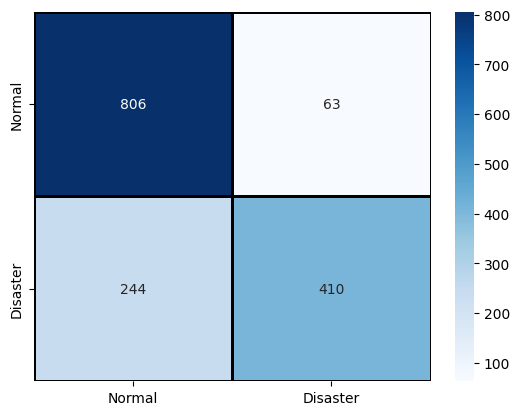

In [41]:
#Model Prediction

pred_mnb3 = mnb_tf3.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_mnb3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_mnb3)
prec = precision_score(y_test, pred_mnb3)
rec = recall_score(y_test, pred_mnb3)
f1 = f1_score(y_test, pred_mnb3)


mod_results = pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Trigram', acc, prec, rec, specificity, f1]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score'])
results = pd.concat([results, mod_results], ignore_index=True)


results

In [42]:
#Passive Aggressive Classifier - Tri Gram

pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train_3, y_train)

## cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass3 = cross_val_score(estimator = pass_tf3, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_pass3.mean()



0.7935960591133006

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.733800
1,Passive Aggressive Classifier - TFIDF-Bigram,0.784636,0.742560,0.762997,0.920598,0.752640
2,Multinomial Naive Bayes - TFIDF-Trigram,0.798424,0.866808,0.626911,0.920598,0.727595
3,Passive Aggressive Classifier - TFIDF-Trigram,0.778070,0.729651,0.767584,0.920598,0.748137


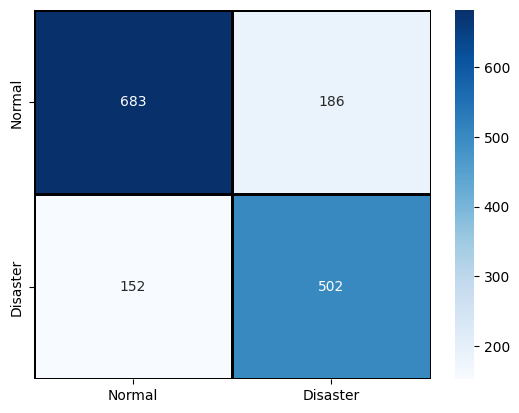

In [43]:
pred_pass3 = pass_tf3.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_pass3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_pass3)
prec = precision_score(y_test, pred_pass3)
rec = recall_score(y_test, pred_pass3)
f1 = f1_score(y_test, pred_pass3)

mod1_results =pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Trigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
results = pd.concat([results, mod1_results], ignore_index=True)


results


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modellerin oluşturulması
svm_classifier = SVC(kernel='linear')
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

# Modellerin cross-validation ile performansının değerlendirilmesi
svm_cv_scores = cross_val_score(svm_classifier, tfidf_train_2, y_train, cv=10, scoring='accuracy')
dt_cv_scores = cross_val_score(dt_classifier, tfidf_train_2, y_train, cv=10, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_classifier, tfidf_train_2, y_train, cv=10, scoring='accuracy')
gb_cv_scores = cross_val_score(gb_classifier, tfidf_train_2, y_train, cv=10, scoring='accuracy')

# Her modelin cross-validation skorlarının yazdırılması
print("SVM Cross-Validation Skorları:")
print(svm_cv_scores)
print("Ortalama Accuracy:", svm_cv_scores.mean())
print()

print("Decision Tree Cross-Validation Skorları:")
print(dt_cv_scores)
print("Ortalama Accuracy:", dt_cv_scores.mean())
print()

print("Random Forest Cross-Validation Skorları:")
print(rf_cv_scores)
print("Ortalama Accuracy:", rf_cv_scores.mean())
print()

print("Gradient Boosting Cross-Validation Skorları:")
print(gb_cv_scores)
print("Ortalama Accuracy:", gb_cv_scores.mean())



SVM Cross-Validation Skorları:
[0.7816092  0.76683087 0.80952381 0.80788177 0.7816092  0.80623974
 0.7816092  0.79967159 0.79967159 0.79967159]
Ortalama Accuracy: 0.7934318555008211

Decision Tree Cross-Validation Skorları:
[0.73891626 0.72906404 0.75041051 0.72249589 0.73727422 0.76026273
 0.71921182 0.74220033 0.74876847 0.727422  ]
Ortalama Accuracy: 0.7376026272577996

Random Forest Cross-Validation Skorları:
[0.77339901 0.76847291 0.78817734 0.77668309 0.77011494 0.75697865
 0.76190476 0.78325123 0.77175698 0.76190476]
Ortalama Accuracy: 0.771264367816092

Gradient Boosting Cross-Validation Skorları:
[0.75041051 0.72249589 0.75533662 0.7454844  0.73727422 0.73727422
 0.73399015 0.74384236 0.73563218 0.73891626]
Ortalama Accuracy: 0.7400656814449917


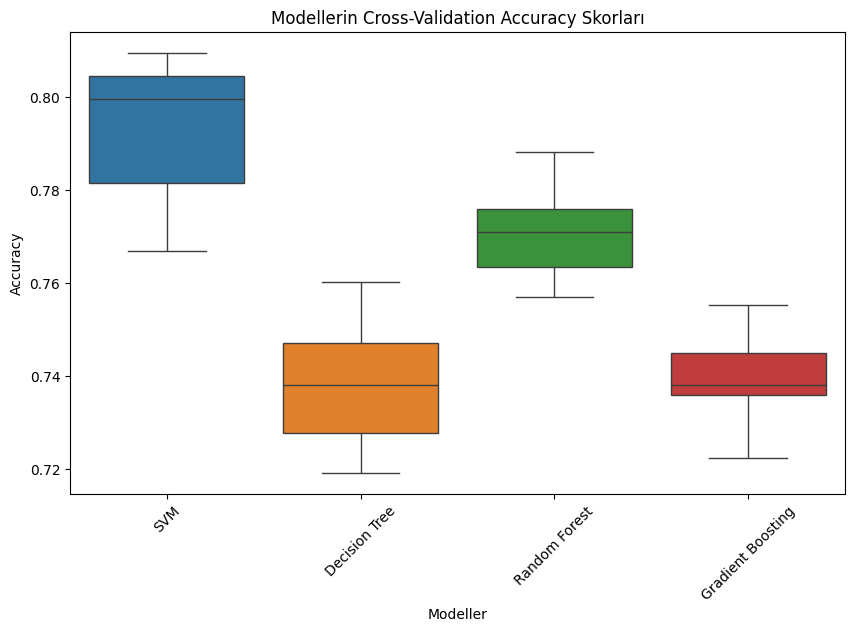

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tüm modellerin cross-validation skorlarını birleştirme
all_cv_scores = {
    "SVM": svm_cv_scores,
    "Decision Tree": dt_cv_scores,
    "Random Forest": rf_cv_scores,
    "Gradient Boosting": gb_cv_scores
}

# Verileri DataFrame'e dönüştürme
cv_scores_df = pd.DataFrame(all_cv_scores)

# Boxplot grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores_df)
plt.title("Modellerin Cross-Validation Accuracy Skorları")
plt.ylabel("Accuracy")
plt.xlabel("Modeller")
plt.xticks(rotation=45)
plt.show()


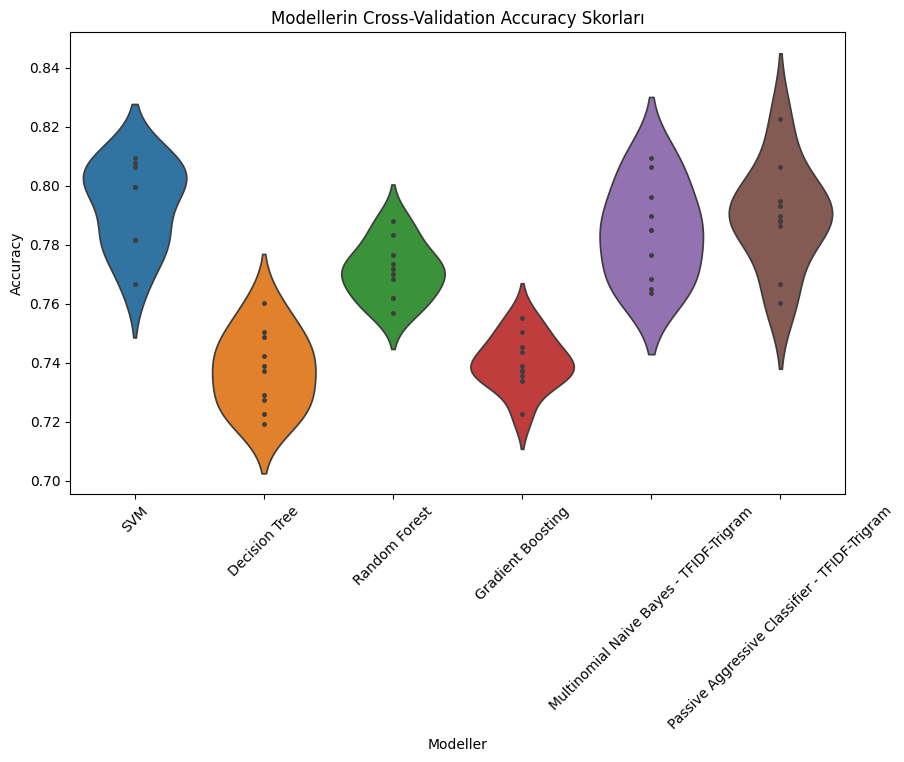

In [59]:
# Son skorları DataFrame'e ekleyerek birleştirme
all_cv_scores["Multinomial Naive Bayes - TFIDF-Trigram"] = acc_mnb3
all_cv_scores["Passive Aggressive Classifier - TFIDF-Trigram"] = acc_pass3

# DataFrame'i güncelleme
cv_scores_df = pd.DataFrame(all_cv_scores)

# Violinplot grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.violinplot(data=cv_scores_df, inner="point")
plt.title("Modellerin Cross-Validation Accuracy Skorları")
plt.ylabel("Accuracy")
plt.xlabel("Modeller")
plt.xticks(rotation=45)
plt.show()


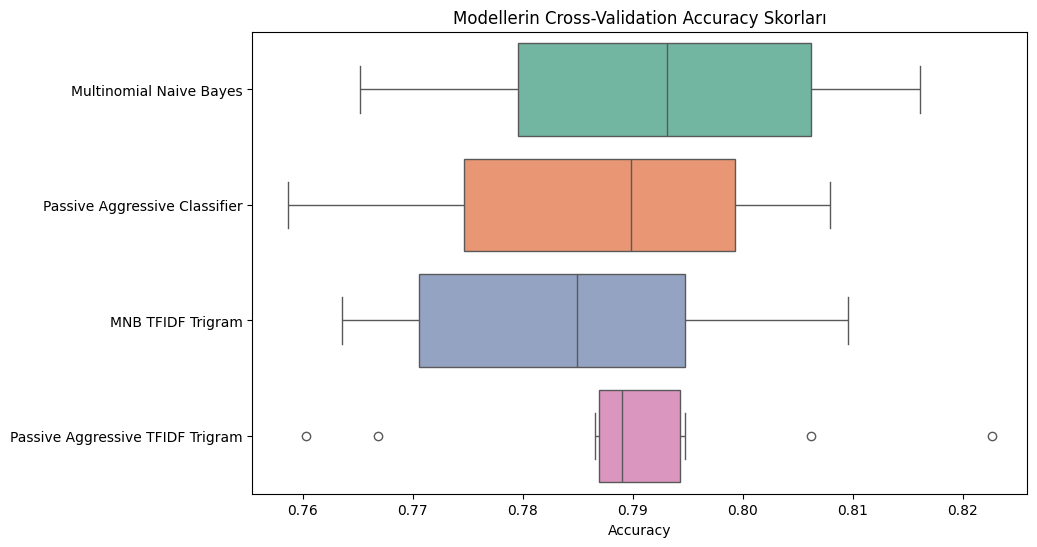

In [63]:
# Modellerin cross-validation accuracy skorlarının görselleştirilmesi
cv_scores_df = pd.DataFrame({
    'Multinomial Naive Bayes': acc_mnb2,
    'Passive Aggressive Classifier': acc_pass2,
    'MNB TFIDF Trigram': acc_mnb3,
    'Passive Aggressive TFIDF Trigram': acc_pass3
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores_df, orient="h", palette="Set2")
plt.title("Modellerin Cross-Validation Accuracy Skorları")
plt.xlabel("Accuracy")
plt.show()


In [65]:
# Örnek metinler oluşturma
test_sentences = [
    "There is a fire in the building, please evacuate immediately.",
    "I love sunny days, let's go for a picnic!",
    "An earthquake hit the city, lots of buildings collapsed.",
    "The new restaurant in town is amazing, I highly recommend it!",
    "Heavy rain is expected tomorrow, don't forget your umbrella.",
    "Just saw a car accident on the highway, traffic is blocked.",
    "The concert last night was fantastic, I had a great time!",
    "Tornado warning issued for the area, take shelter immediately.",
    "I can't believe how cold it is today, winter is definitely here.",
    "Received a tsunami warning on my phone, stay safe everyone."
]

# TF-IDF trigram vektörlerini oluşturma
tfidf_test_samples = tfidf_vectorizer_3.transform(test_sentences)

# Model tahmini yapma
predictions = pass_tf3.predict(tfidf_test_samples)

# Tahmin sonuçlarını yazdırma
for text, label in zip(test_sentences, predictions):
    if label == 1:
        target = "Disaster Tweet"
    else:
        target = "Normal Tweet"
    print("Text:", text)
    print("Class:", target)
    print()


Text: There is a fire in the building, please evacuate immediately.
Class: Disaster Tweet

Text: I love sunny days, let's go for a picnic!
Class: Normal Tweet

Text: An earthquake hit the city, lots of buildings collapsed.
Class: Disaster Tweet

Text: The new restaurant in town is amazing, I highly recommend it!
Class: Normal Tweet

Text: Heavy rain is expected tomorrow, don't forget your umbrella.
Class: Disaster Tweet

Text: Just saw a car accident on the highway, traffic is blocked.
Class: Disaster Tweet

Text: The concert last night was fantastic, I had a great time!
Class: Normal Tweet

Text: Tornado warning issued for the area, take shelter immediately.
Class: Disaster Tweet

Text: I can't believe how cold it is today, winter is definitely here.
Class: Normal Tweet

Text: Received a tsunami warning on my phone, stay safe everyone.
Class: Disaster Tweet



In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Pipeline oluşturma: TF-IDF vektörizasyonu ve Multinomial Naive Bayes modeli
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('mnb', MultinomialNB())
])

# Parametre grid'i tanımlama
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Bi-gram ve tri-gram için
    'tfidf__max_df': [0.7, 0.8, 0.9, 1.0],  # Max_df değerleri
}

# GridSearchCV objesi oluşturma
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eğitim verisi üzerinde parametre optimizasyonu
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi doğruluk değerini yazdırma
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)

# En iyi modeli kullanarak tahmin yapma
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


En iyi parametreler: {'tfidf__max_df': 0.7, 'tfidf__ngram_range': (1, 2)}
En iyi doğruluk: 0.7952380952380952
